In [4]:
from scipy.stats import bernoulli

In [5]:
p = 0.6

In [6]:
rv = bernoulli(p)
rv.pmf(k=1)  #Main Mass Function

0.6

In [7]:
rv.pmf(k=0)

0.4000000000000001

In [8]:
#Advertising Problem
from scipy.stats import binom
p = 0.01
n = 100
rv = binom(n, p )
print(rv.pmf(1))
print(rv.pmf(5))

0.36972963764972666
0.002897787123761478


In [14]:
#Poisson Distribution
#Business Application : Wrong announcement entry
from scipy.stats import poisson 
lambda_ = 0.1 

In [16]:
rv = poisson(mu = lambda_)
print(rv.pmf(k=0)) # k = Wrong announcement number

0.9048374180359595


In [18]:
print(rv.pmf(k=3))

0.00015080623633932676


In [20]:
print(rv.pmf(k=5))

7.54031181696634e-08


In [22]:
# Normal Distribution
from scipy.stats import norm

1 - norm.cdf(90,80,5) #1-(The probability of values from 80’ up to 90’ (included)) = the probability of values greater than 90’
# mean = 80
# the value we want to calculate = 90
# standart deviation = 5

0.02275013194817921

In [24]:
#Single Sample T Test
import numpy as np 
Data = np.random.randint(1,200,60)
Data

array([ 24, 161, 139,  60, 127, 105,  98, 136, 130,  90,  42, 145,  35,
       159,  45,  81, 116,  12, 134, 165,  24, 116,  94, 178, 146,  33,
       154,  55, 134,  69,   5, 139, 115, 198, 120,  35, 110, 135, 171,
         9, 172,  95, 192,  38, 196, 162, 129, 193,  92,  17, 145,  48,
        77, 123,  42,  16, 110, 167, 121, 179])

In [26]:
import scipy.stats as stats 
import pandas as pd

In [28]:
stats.describe(Data)

DescribeResult(nobs=60, minmax=(5, 198), mean=105.96666666666667, variance=3107.7615819209036, skewness=-0.239661128577008, kurtosis=-1.0804544898331394)

In [30]:
# This mean result may be just luck :D So we need to check !!

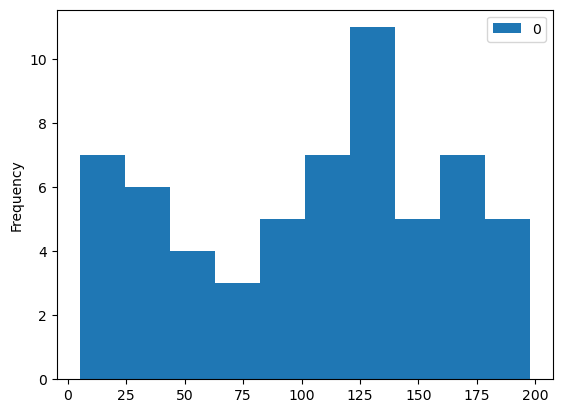

In [32]:
#Histogram
pd.DataFrame(Data).plot.hist();

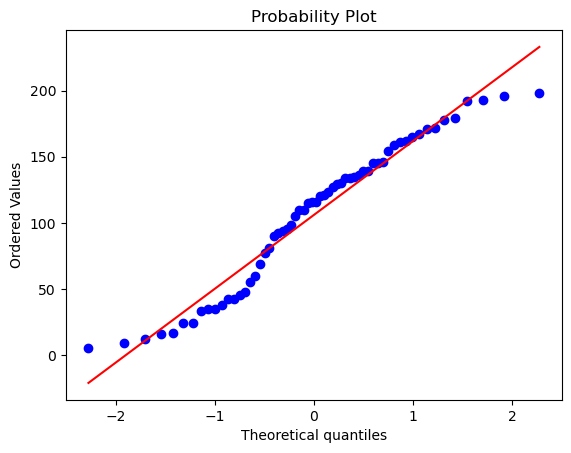

In [33]:
import pylab
stats.probplot(Data,dist = "norm" , plot = pylab)
pylab.show()

In [34]:
#Shapiro-Wilks Test
from scipy.stats import shapiro

In [38]:
shapiro(Data)

ShapiroResult(statistic=0.9494162175853157, pvalue=0.014622909234420608)

In [40]:
print("T Calculation Statistic:" + str(shapiro(Data)[0]))
print("Calculated P-Value :" + str(shapiro(Data)[1]))

T Calculation Statistic:0.9494162175853157
Calculated P-Value :0.014622909234420608


In [42]:
#Hypothesis Test

In [44]:
stats.ttest_1samp(Data, popmean= 170)

TtestResult(statistic=-8.897292913894015, pvalue=1.6948779574445738e-12, df=59)

In [46]:
#Nonparametric Single Sample Test

In [48]:
from statsmodels.stats.descriptivestats import sign_test

In [50]:
sign_test(Data,170)

(-22.0, 5.205691473372798e-09)

In [52]:
#single sample rate test
from statsmodels.stats.proportion import proportions_ztest

In [54]:
count = 40
nobs = 500
value = 0.125 # Click Ratio

In [56]:
proportions_ztest(count,nobs,value)

(-3.7090151628513017, 0.0002080669689845979)

In [85]:
# Independent Sample Test
A = np.random.randint(1,30,30)
B = np.random.randint(1,30,30)
A1=pd.DataFrame(A, columns = ["sutun1"])
B2=pd.DataFrame(B, columns = ["sutun1"])

In [91]:
#Creating A Grup
GRUP_A = np.arange(len(A1))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A1= pd.concat([A1 , GRUP_A], axis = 1)

C:\Users\semeh\AppData\Local\Temp\ipykernel_29368\2059037704.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'A' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  GRUP_A[:] = "A"


In [103]:
GRUP_B = np.arange(len(B2))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B1 = pd.concat([B2, GRUP_B], axis= 1) #This is actually second column

C:\Users\semeh\AppData\Local\Temp\ipykernel_29368\4294336038.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'B' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  GRUP_B[:] = "B"


In [109]:
#ALL DATA 
AB = pd.concat([A1,B1])
AB.columns = ["income","GRUP"] # I forgot to include columns names earlier, so here they are
print(AB.head())
print(AB.tail()) 

   gelir GRUP
0     21    A
1     26    A
2     16    A
3      8    A
4     28    A
    gelir GRUP
25      1    B
26     26    B
27     29    B
28      1    B
29     23    B


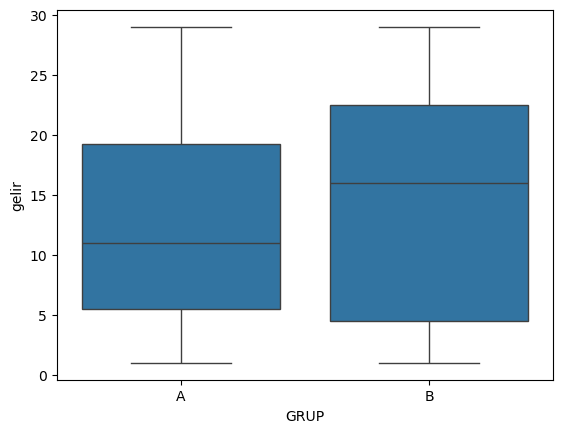

In [111]:
import seaborn as sns
sns.boxplot(x = "GRUP" , y = "income", data = AB);

In [1]:
# TWO SAMPLE RATE TEST
